# Импорт

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from Classes.CartTreeClassifier import CartTreeClassifier
from Classes.CartTreeTeacher import CartTreeTeacher

from Functions.metrics import *
from Functions.split_functions import *
from Functions.spreading_functions import *
from Functions.search_split_functions import *
from Functions.metrics import accuracy

from Functions.errorFunctions import MAE, MAPE, MSE, RMSE, R2


# Загрузка датасета для регрессии.

In [2]:
models = pd.read_csv('../Data/DataLaba1/energy_task_moded.csv')
models = models.drop('year', axis=1)
for i in models.columns:
    models[i] = (models[i]-models[i].mean())/models[i].std()


# Разбиваем на выборку

In [3]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.6)


# Cart Tree Regressor

In [4]:

def search_params_dispertinised(x: np.array, y: np.array, err=0):
    d = (np.inf, np.inf, np.inf)
    k = dis(y)
    for i in range(x.T.shape[0]):
        for j in x.T[i]:
            y1 = y[x.T[i] >= j]
            y2 = y[x.T[i] < j]

            g = k - (dis(y1) + dis(y2))
            d = min((g, j, i), d,
                    key=lambda a: a[0])
            print(d)
            if d[0] <= err:
                return d
    return d


def dis(y):
    r = 0
    for i in y:
        for j in y:
            r += 0.5 * (i - j)**2
    # print(r)
    return r / (y.shape[0]**2) if (y.shape[0]**2) else 0


In [16]:
ctc = CartTreeClassifier()
ctt = CartTreeTeacher(ctc, lambda a, b: classic_split(
    a, b[1], b[2]), search_params_in_no_district, lambda a, b: a**2 and b > 0, -1)
ctt.teach(X_train.to_numpy()[0:350], y_train.to_numpy()[0:350])


In [17]:
y_predicted = ctc.predict(X_test.to_numpy())


In [18]:
my_line_regression_classic_errors = {'MAE': MAE(y_predicted, y_test.to_numpy()),
                                     'RMSE': RMSE(y_predicted, y_test.to_numpy()),
                                     'MSE': MSE(y_predicted, y_test.to_numpy()),
                                     'MAPE': MAPE(y_predicted, y_test.to_numpy()),
                                     'R^2': R2(y_predicted, np.array(y_test.to_numpy()))
                                     }

my_line_regression_classic_errors


{'MAE': 0.7376623098602816,
 'RMSE': 1.3591527574007711,
 'MSE': 1.8472962179501193,
 'MAPE': 2.9185253132203415,
 'R^2': 0.9997186826116119}

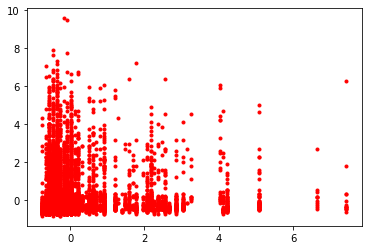

In [19]:
import matplotlib.pyplot as plt
plt.plot(y_predicted, y_test, 'ro', markersize=3)
# plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)


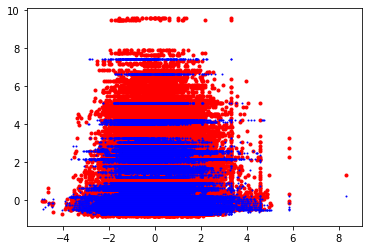

In [20]:
import matplotlib.pyplot as plt
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, y_predicted, 'bo', markersize=1)
